                             Mini Projet Deep-Learning
              
                       
                      
                       Rania AYADI        
                 2éme année Informatique                    ENSEIRB-MATMECA
                                         
                                                              --2017-2018--
                                                                                             
                                                                                             
                                                                                             
                                                                                             

#  Simple Classification

## loading our data

In [30]:
%%capture
from mp1 import generate_dataset_classification 
import sys
import matplotlib
from PIL import Image
from matplotlib import cm
import numpy as np
[X_train, y_train] = generate_dataset_classification(300, 20);
import matplotlib.pyplot as plt

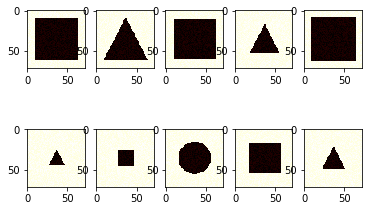

In [31]:
#visualizing images

im = X_train.reshape(X_train.shape[0], 72, 72) 
f, mat = plt.subplots(2,5)
mat[0,0].imshow(im[0],cmap=cm.afmhot)
mat[0,1].imshow(im[1],cmap=cm.afmhot)
mat[0,2].imshow(im[2],cmap=cm.afmhot)
mat[0,3].imshow(im[3],cmap=cm.afmhot)
mat[0,4].imshow(im[4],cmap=cm.afmhot)
mat[1,0].imshow(im[5],cmap=cm.afmhot)
mat[1,1].imshow(im[6],cmap=cm.afmhot)
mat[1,2].imshow(im[7],cmap=cm.afmhot)
mat[1,3].imshow(im[8],cmap=cm.afmhot)
mat[1,4].imshow(im[9],cmap=cm.afmhot)

In [32]:
#Reformating the Desired Input

X_train = X_train.reshape(X_train.shape[0],1, 72, 72)
print (X_train.shape)
X_train /= 255

(300, 1, 72, 72)


In [33]:
#Reformating the Desired Output

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 3) 
print (Y_train.shape)

(300, 3)


## Defining the keras model

In [ ]:
#Creating the Model

In [34]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D 

model = Sequential() 
model.add(Conv2D(32, (9, 9),
                 activation='relu', 
                 input_shape=(1,72,72), 
                 data_format='channels_first'))

print(model.output_shape)

(None, 32, 64, 64)


In [35]:
model.add(Conv2D(32, (9, 9)))
print(model.output_shape)   

(None, 24, 56, 32)


In [36]:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

(None, 12, 28, 32)


In [37]:
model.add(Dropout(0.25))
print(model.output_shape)

(None, 12, 28, 32)


In [38]:
from keras.layers import Flatten
model.add(Flatten())
print(model.output_shape)


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

(None, 10752)


## Optimization

In [ ]:
#Defining the Optimization Method

In [39]:

#the stochastic gradient descent optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']) 



In [40]:
#Running the Optimization
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
300/300 [==============================] - 11s 36ms/step - loss: 1.0987 - acc: 0.3467
Epoch 2/10
300/300 [==============================] - 11s 37ms/step - loss: 1.0975 - acc: 0.3567
Epoch 3/10
300/300 [==============================] - 11s 38ms/step - loss: 1.0978 - acc: 0.3633
Epoch 4/10
300/300 [==============================] - 11s 36ms/step - loss: 1.0963 - acc: 0.3700
Epoch 5/10
300/300 [==============================] - 11s 35ms/step - loss: 1.0964 - acc: 0.3567
Epoch 6/10
300/300 [==============================] - 10s 35ms/step - loss: 1.0970 - acc: 0.3567
Epoch 7/10
300/300 [==============================] - 10s 35ms/step - loss: 1.0946 - acc: 0.3700
Epoch 8/10
300/300 [==============================] - 10s 35ms/step - loss: 1.0957 - acc: 0.3567
Epoch 9/10
300/300 [==============================] - 10s 35ms/step - loss: 1.0966 - acc: 0.3533
Epoch 10/10
300/300 [==============================] - 10s 35ms/step - loss: 1.0948 - acc: 0.3633


In [46]:

#Adam optimizer

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

#Running the Optimization
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
300/300 [==============================] - 8s 27ms/step - loss: 1.1195 - acc: 0.3433
Epoch 2/10
300/300 [==============================] - 11s 38ms/step - loss: 1.1147 - acc: 0.2967
Epoch 3/10
300/300 [==============================] - 12s 41ms/step - loss: 1.0927 - acc: 0.3467
Epoch 4/10
300/300 [==============================] - 11s 37ms/step - loss: 1.0799 - acc: 0.3900
Epoch 5/10
300/300 [==============================] - 11s 36ms/step - loss: 0.9937 - acc: 0.5967
Epoch 6/10
300/300 [==============================] - 12s 41ms/step - loss: 0.8286 - acc: 0.6300
Epoch 7/10
300/300 [==============================] - 11s 37ms/step - loss: 0.6240 - acc: 0.7033
Epoch 8/10
300/300 [==============================] - 11s 35ms/step - loss: 0.5177 - acc: 0.7133
Epoch 9/10
300/300 [==============================] - 11s 35ms/step - loss: 0.4484 - acc: 0.7733
Epoch 10/10
300/300 [==============================] - 11s 36ms/step - loss: 0.4051 - acc: 0.7933


## Score the model 

In [47]:
scores = model.evaluate(X_train,Y_train)
print ("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

300/300 [==============================] - 3s 9ms/step
acc: 78.33%


* The stochastic gradient descent optimizer is better then the Adam optimizer with accuracy=78%.
* with a greater number of epoch we find a higher precision and we can continue the optimization until the objective function stabilizes

## Testing

In [45]:
from mp1 import generate_a_disk 
X_test = generate_a_disk()
print (X_test.shape)
X_test = X_test.reshape(1,1, 72, 72)
print (X_test.shape)

(5184,)
(1, 1, 72, 72)


In [46]:
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

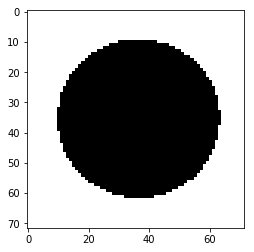

In [47]:
plt.imshow(X_test.reshape(72,72), cmap='gray')

In [48]:
from mp1 import generate_a_rectangle
X_test2 = generate_a_rectangle()
X_test2 = X_test2.reshape(1,1, 72, 72)
model.predict(X_test2)

array([[1., 0., 0.]], dtype=float32)

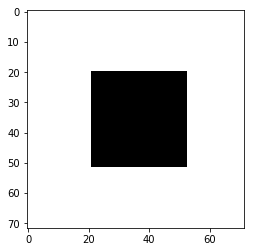

In [49]:
plt.imshow(X_test2.reshape(72,72), cmap='gray')

#  Visualization of the Solution

In [ ]:
model.get_weights()
#get_weights() for a Dense layer returns a list of two elements,
#the first element contains the weights, and the second element contains the biases